# 1. Install Dependency & Importing Libraries

In [5]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python matplotlib --user

  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached tensorflow_gpu-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.



  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Using cached tensorboard-2.16.1-py3-none-any.whl (5.5 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Using cached tensor

In [7]:
!pip install opencv-python-headless
!pip install numpy
!pip install matplotlib

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [17]:
!pip install tensorflow

In [11]:
pip install --upgrade typing-extensions

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.10.0 which is incompatible.
tensorflow-gpu 2.5.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.10.0 which is incompatible.


In [12]:
pip install --upgrade typing-extensions~=3.7.4

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.10.0
    Uninstalling typing-extensions-4.10.0:
      Successfully uninstalled typing-extensions-4.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


In [7]:
!pip install tensorflow-gpu

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.4.2 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.


In [2]:
#Tensorflow functional API
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D, Input, Flatten


In [3]:
#setting up path

POS_PATH=os.path.join('Deep_Learning_Data','positive')
NEG_PATH=os.path.join('Deep_Learning_Data','negative')
ANC_PATH=os.path.join('Deep_Learning_Data','anchor')

In [4]:
#Making folder
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Deep_Learning_Data\\positive'

# 2. Collecting Data

In [20]:
# Used https://vis-www.cs.umass.edu/lfw/#download to download data we download ' All images as gzipped tar file '
# in the download section of the page

In [25]:
# uncompressing the tar zip file
!tar -xf lfw.tgz


In [28]:
# Moving lfx data to negative folder we created

for dic in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw',dic)):
        EX_PATH = os.path.join('lfw',dic,file)
        NEW_PATH = os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)

In [4]:
# Importing a Library to give unique names for our captured Images

import uuid

uuid.uuid1()

UUID('8ccb4d49-ecbe-11ee-865c-5081409bac1f')

In [7]:

cap = cv2.VideoCapture(0)
while cap.isOpened:
    ret, frame = cap.read()
    
    frame = frame[120:120+250,200:200+250,:]
    
    # Collect Anchour
    
    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
    
    #Collect Positives
    
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        
    
    
    cv2.imshow('Image Collection',frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 3. Preprocessing

In [5]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [6]:
#Sacling and resizing

def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img/255.0
    return img

In [7]:
#Making Labelled Data

positives = tf.data.Dataset.zip((anchor,positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor,negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

# Here we r basically definting that +ve and -ve datasets and their representation so +ve ie anchor and +ve images would suggest
# 1.0 value and that for ancor and negative value would 0.0

# Format of storing is (),(),() where 1st () signifies achor images 2nd either +ve or -ve image and 3rd would either 1.0 or 0.0
# indicating correct or false match

In [8]:
# Here, basically we r preprocessing both input and valid img to reqired sizes and concatenating them along with 
# label ie 1.0 or 0.0 basically same format as mentioned in above cell

def preprocess_twin(input_img,validation_img,label):
    return (preprocess(input_img),preprocess(validation_img),label)
    

In [9]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [10]:
# Training partition
train_data =  data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [11]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

In [13]:
inp= Input(shape=(100,100,3), name='input_image')

In [14]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64,(2,2), padding='same')(c1)

c2 = Conv2D(128,(7,7),activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64,(2,2), padding='same')(c3)
    
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [15]:
mod = Model(inputs=[inp],outputs=[d1],name='embedding')

In [16]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [12]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')
    
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2), padding='same')(c1)
    
    c2 = Conv2D(128,(7,7),activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64,(2,2), padding='same')(c3)
    
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    return Model(inputs=[inp],outputs=[d1],name='embedding')

In [17]:
embedding = Model(inputs=[inp],outputs=[d1],name='embedding')

In [18]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [19]:
# Build Distance

class L1Dist(Layer):
    
    def __init(self, **kwargs):
        super().__init__()
        
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)
    
    

In [20]:
# Siamese Model

def make_siamese_model():
    
    input_image = Input(name='input_img', shape=(100,100,3))
    
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')


In [22]:
input_image = Input(name='input_img', shape=(100,100,3))
    
validation_image = Input(name='validation_img', shape=(100,100,3))

In [23]:
inp_embedding = embedding(input_image)

val_embedding = embedding(validation_image)

In [24]:
siamese_layer = L1Dist()

In [25]:
distances = siamese_layer(inp_embedding,val_embedding)

In [26]:
classifier = Dense(1, activation='sigmoid')(distances)

In [27]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

In [28]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [29]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [30]:
siamese_model =  make_siamese_model()

In [32]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Training Model

In [31]:
# Setup Loss and Optimizer

binary_cross_loss = tf.losses.BinaryCrossentropy()

In [34]:
opt =  tf.keras.optimizers.Adam(1e-4)

In [35]:
# Establish Checkpoints

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint =  tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [36]:
@tf.function
def train_step(batch):
    
    #Record all Operations
    with tf.GradientTape() as tape:
        
        X = batch[:2]
        
        y = batch[2]
        
        yhat = siamese_model(X, training=True)  #basically y-predict
        
        loss = binary_cross_loss(y, yhat)
    print(loss)
    
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss

In [40]:
# Building Training Loop

def train(data, EPOCHS):
    # Loop through each Epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        #Loop through each batch
        for idx, batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)
            
        # save checkpoints
        if epoch % 10 ==0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [41]:
EPOCHS = 50

In [42]:
train(train_data,EPOCHS)


 Epoch 1/50
27/27 [==============================] - 16s 611ms/step

 Epoch 2/50
27/27 [==============================] - 16s 605ms/step

 Epoch 3/50
27/27 [==============================] - 16s 611ms/step

 Epoch 4/50
27/27 [==============================] - 16s 615ms/step

 Epoch 5/50
27/27 [==============================] - 16s 617ms/step

 Epoch 6/50
27/27 [==============================] - 16s 619ms/step

 Epoch 7/50
27/27 [==============================] - 16s 622ms/step

 Epoch 8/50
27/27 [==============================] - 20s 772ms/step

 Epoch 9/50
27/27 [==============================] - 16s 620ms/step

 Epoch 10/50
27/27 [==============================] - 16s 620ms/step

 Epoch 11/50
27/27 [==============================] - 16s 619ms/step

 Epoch 12/50
27/27 [==============================] - 16s 619ms/step

 Epoch 13/50
27/27 [==============================] - 16s 619ms/step

 Epoch 14/50
27/27 [==============================] - 16s 619ms/step

 Epoch 15/50
27/27 [========

# Evaluating Model

In [32]:
from tensorflow.keras.metrics import Precision, Recall

In [33]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [52]:
y_hat = siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 0s 21ms/step


array([[1.0000000e+00],
       [1.1863079e-05],
       [9.9999893e-01],
       [4.2268961e-10],
       [2.1253791e-07],
       [9.9999928e-01],
       [1.0000000e+00],
       [9.9999833e-01],
       [9.9999964e-01],
       [3.5852561e-09],
       [6.2749389e-10],
       [9.9999905e-01],
       [1.0000000e+00],
       [9.9999607e-01],
       [2.3574025e-06],
       [6.1223622e-09]], dtype=float32)

In [53]:
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

In [54]:
y_true

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

In [55]:
m = Recall()

m.update_state(y_true, y_hat)

m.result().numpy()

1.0

In [56]:
m = Precision()

m.update_state(y_true, y_hat)

m.result().numpy()

1.0

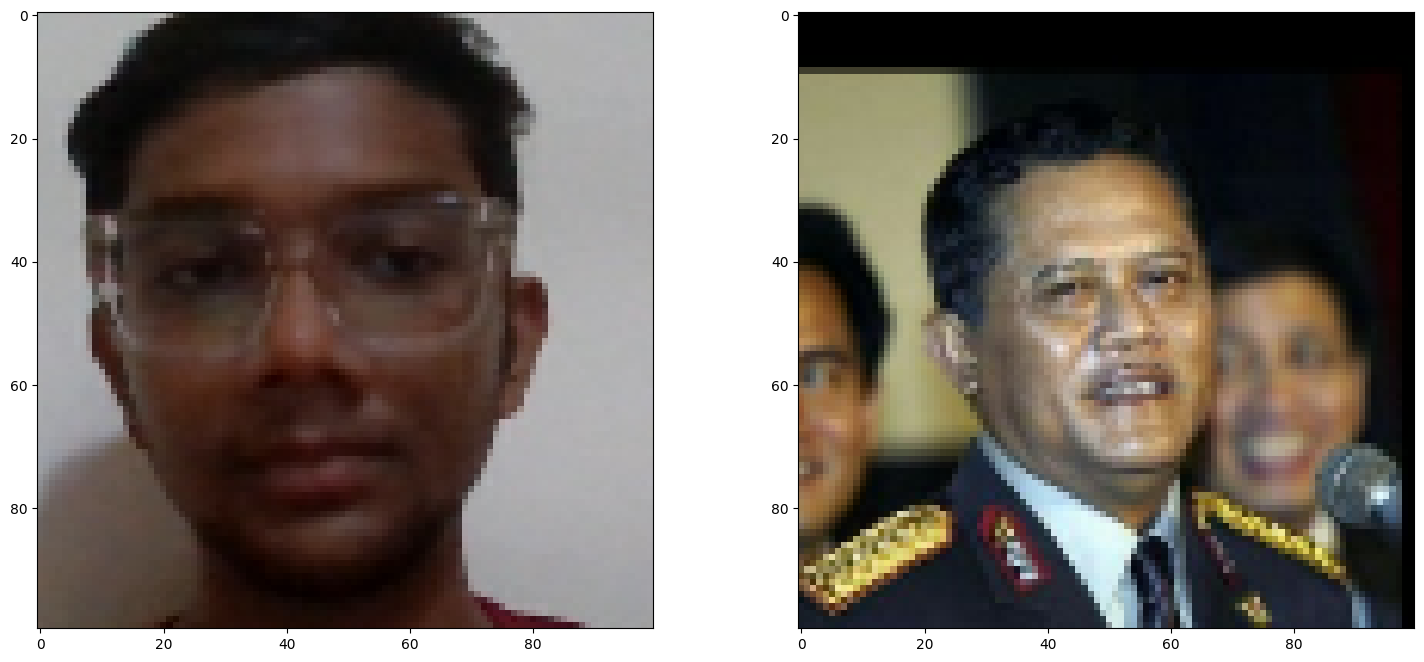

In [61]:
# Visualize Data

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.imshow(test_input[3])
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()

# Saving Model

In [34]:
siamese_model.save('siamesemodel.h5')

In [35]:
model =  tf.keras.models.load_model('siamesemodel.h5',custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [67]:
model.predict([test_input,test_val])

1/1 [==============================] - 0s 93ms/step


array([[1.0000000e+00],
       [1.1863079e-05],
       [9.9999893e-01],
       [4.2268961e-10],
       [2.1253791e-07],
       [9.9999928e-01],
       [1.0000000e+00],
       [9.9999833e-01],
       [9.9999964e-01],
       [3.5852561e-09],
       [6.2749389e-10],
       [9.9999905e-01],
       [1.0000000e+00],
       [9.9999607e-01],
       [2.3574025e-06],
       [6.1223622e-09]], dtype=float32)

In [69]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Real Time Verification

In [36]:
def verification(frame, model, detection_threshold, verification_threshold):

    loc = os.listdir(os.path.join('application_data', 'verification_images'))
    results=[]
    for image in loc:
        input_img = preprocess(os.path.join('application_data','input_image','input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data','verification_images',image))

        result = model.predict(list(np.expand_dims([input_img, validation_img],axis=1)))
        results.append(result)

    detection = np.sum(np.array(results)>detection_threshold)

    verification = detection / len(os.listdir(os.path.join('application_data','verification_images')))
    verified = verification > verification_threshold

    return result, verified

In [83]:
os.listdir(os.path.join('application_data', 'verification_images'))

['40e2bf2d-e841-11ee-83a7-5081409bac1f.jpg',
 '40f10e3b-e841-11ee-bdd3-5081409bac1f.jpg',
 '40f74270-e841-11ee-bc76-5081409bac1f.jpg',
 '414d9f14-e841-11ee-9ca8-5081409bac1f.jpg',
 '415b888a-e841-11ee-b3c4-5081409bac1f.jpg',
 '416fbb36-e841-11ee-83e0-5081409bac1f.jpg',
 '417d5885-e841-11ee-9166-5081409bac1f.jpg',
 '419e489d-e841-11ee-884a-5081409bac1f.jpg',
 '41a555e6-e841-11ee-9321-5081409bac1f.jpg',
 '41b38b6f-e841-11ee-acc0-5081409bac1f.jpg',
 '41c23565-e841-11ee-8dee-5081409bac1f.jpg',
 '41cfc1c5-e841-11ee-b67a-5081409bac1f.jpg',
 '41dd5bb1-e841-11ee-8c61-5081409bac1f.jpg',
 '41f1aa52-e841-11ee-bc8b-5081409bac1f.jpg',
 '41f91696-e841-11ee-b668-5081409bac1f.jpg',
 '423f08cf-e841-11ee-ad25-5081409bac1f.jpg',
 '424cc98c-e841-11ee-85ad-5081409bac1f.jpg',
 '427f8f92-e841-11ee-887c-5081409bac1f.jpg',
 '428d5ca0-e841-11ee-b436-5081409bac1f.jpg',
 '429cbb4f-e841-11ee-8b62-5081409bac1f.jpg',
 '42a9cfdb-e841-11ee-8e73-5081409bac1f.jpg',
 '42b6e384-e841-11ee-880e-5081409bac1f.jpg',
 '42bd1c3e

In [43]:

cap = cv2.VideoCapture(0)
while cap.isOpened:
    ret, frame = cap.read()
    
    frame = frame[120:120+250,200:200+250,:]
    
    if cv2.waitKey(1) & 0XFF == ord('v'):
        cv2.imwrite(os.path.join('application_data','input_image','input_image.jpg'),frame)
        results, verified = verification(frame,model,0.5,0.5)
        print(verified)
    
    cv2.imshow('Verification',frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step
False
1/1 [==============================] - 0s 18ms/step
True
1/1 [==============================] - 0s 16ms/step
True
